# Geolocation in conversations
- extract geolocation information from tweets

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import folium
from folium import plugins
from source.visualization_helper import init_plot_style
from source.visualization_helper import export_map
from source.conversation_helper import conversation_filter

In [3]:
init_plot_style()

In [4]:
ds = pd.read_csv('/Users/john/data/twitter/tweets_ec_nd_conv_geo.csv', 
                 usecols=['id', 'screen_name','text','latitude', 
                          'longitude','in_reply_to_status_id',
                          'num_replies', 'conversation_id','dist_from_home'])
ds.shape

(2716464, 9)

In [5]:
geo_tweets = ds[~ds.latitude.isnull()]
conv_tweets = conversation_filter(ds)
geo_conv_tweets = conv_tweets[~conv_tweets.latitude.isnull()]

In [6]:
def show_geo_stats():    
    total = ds.shape[0]
    geolocated = geo_tweets.shape[0]
    perc = geolocated/total
    print(f'tweets: {total:,}')
    print(f'geolocated: {geolocated:,}')
    print(f'geolocated (%): {perc*100:.2f}%')
    # conversations
    total = conv_tweets.shape[0]
    geolocated = geo_conv_tweets.shape[0]
    perc = geolocated/total
    print(f'conversations: {total:,}')
    print(f'geolocated: {geolocated:,}')
    print(f'geolocated (%): {perc*100:.2f}%')

In [7]:
show_geo_stats()

tweets: 2,716,464
geolocated: 326,192
geolocated (%): 12.01%
conversations: 914,381
geolocated: 8,006
geolocated (%): 0.88%


In [8]:
def show_geo_map():
    dsMap = geo_conv_tweets
    lats=dsMap['latitude'].as_matrix()
    lons=dsMap['longitude'].as_matrix()
    points= dsMap[['latitude','longitude']]
    # filter duplicated points
    points =np.unique(points,axis=0)
    points = pd.DataFrame(points)
    points.to_csv('results/geotweetspoints.csv', index=False, header=False)
    locations = points.as_matrix()
    locations.shape
    m = folium.Map(location=[np.mean(lats), np.mean(lons)], zoom_start=2, control_scale=False)
    hm = plugins.HeatMap(data=locations, radius=4, min_opacity=1)
    m.add_child(hm)
    return m

In [9]:
show_geo_map()

# distance from home location

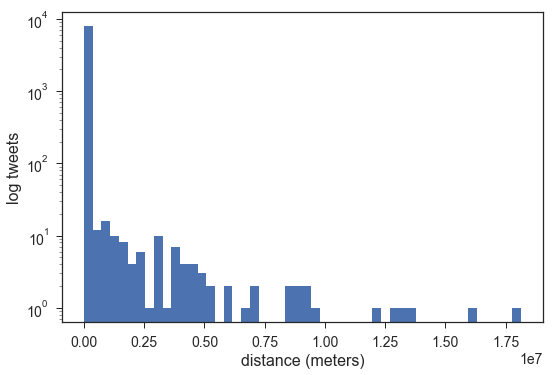

In [29]:
geo_conv_tweets.dist_from_home.plot.hist(bins=50)
plt.yscale('log')
plt.ylabel('log tweets')
plt.xlabel('distance (meters)')
plt.tight_layout()
plt.savefig('results/conv_distance.eps', format='eps')

## long distance conversations

In [32]:
dist=geo_conv_tweets.groupby('conversation_id').agg({'dist_from_home': 'max', 'id': 'count'})
dist=dist.reset_index()
dist.rename(columns={'id': 'count'}, inplace=True)
#dist.sort_values('dist_from_home', ascending=False).head()
dist[dist['count']>2].sort_values('dist_from_home', ascending=False).head()

,conversation_id,dist_from_home,count
5280,839243219498123264,340013.0,3
3184,824392470352064512,167752.0,3
4858,835562877578805249,167473.0,5
2457,819483748349530112,119164.0,4
5136,838072679227883523,98019.0,5


In [42]:
conv_tweets[conv_tweets.conversation_id==839243219498123264].sort_values('id')

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,conversation_id,num_replies,dist_from_home,num_users,num_tweets
5240,839243219498123264,miandrealucia,-4.259893,-79.222969,NaN,Te iba a seguir.,839243219498123264,5,340007.0,3,5
5243,839243951144062979,nmosqueraa,NaN,NaN,8.392432e+17,@miandrealucia pero?,839243219498123264,5,NaN,3,5
5241,839244376232636417,miandrealucia,-4.259893,-79.222969,8.392440e+17,@nmosqueraa Pero nada. :-(,839243219498123264,5,340007.0,3,5
5244,839281387945492484,Wants_Revenge,NaN,NaN,8.392432e+17,@miandrealucia sí te fuiste a loja! 😊,839243219498123264,5,NaN,3,5
5242,839471919774765057,miandrealucia,-4.259937,-79.222995,8.392814e+17,@Wants_Revenge Sí. Hay que venir otra vez y lu...,839243219498123264,5,340013.0,3,5


## short distance
0 distance usually is the same user (self reply)
need to ensure 2 or more users are in the conversation

In [37]:
dist[dist['count']>2].sort_values('dist_from_home', ascending=True).head()

,conversation_id,dist_from_home,count
3279,824663202738962432,12.0,7
3112,823948628247113729,12.0,3
2767,821415683682615297,12.0,5
803,775399131334467584,13.0,4
4501,833638681365864448,14.0,4


In [44]:
conv_tweets[conv_tweets.conversation_id==824663202738962432].sort_values('id')

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,conversation_id,num_replies,dist_from_home,num_users,num_tweets
610182,824663202738962432,superk800radio,NaN,NaN,NaN,AL AIRE \n#FútbolAlDía con: \n@wachito60 \n@LM...,824663202738962432,8,NaN,2,8
610175,824667789709508608,vishaaq,-2.192904,-79.904058,8.246632e+17,@superk800radio @wachito60 @LMBustamante72 @Lu...,824663202738962432,8,12.0,2,8
610176,824667923730092032,vishaaq,-2.192905,-79.904057,8.246632e+17,@superk800radio @wachito60 @LMBustamante72 @Lu...,824663202738962432,8,12.0,2,8
610177,824668119729893377,vishaaq,-2.192905,-79.904057,8.246632e+17,@superk800radio @wachito60 @LMBustamante72 @Lu...,824663202738962432,8,12.0,2,8
610178,824668364383653888,vishaaq,-2.192905,-79.904057,8.246632e+17,@superk800radio @wachito60 @LMBustamante72 @Lu...,824663202738962432,8,12.0,2,8
610179,824668609419083776,vishaaq,-2.192904,-79.904058,8.246632e+17,@superk800radio @wachito60 @LMBustamante72 @Lu...,824663202738962432,8,12.0,2,8
610180,824668890160566276,vishaaq,-2.192904,-79.904057,8.246632e+17,@superk800radio @wachito60 @LMBustamante72 @Lu...,824663202738962432,8,12.0,2,8
610181,824669263420157952,vishaaq,-2.192905,-79.904057,8.246632e+17,@superk800radio @wachito60 No @LMBustamante72 ...,824663202738962432,8,12.0,2,8
